<a href="https://colab.research.google.com/github/YoinerPer0001/KNN-IRIS-DATASET/blob/master/KNN_SPORTSMAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/tmp/ipython-input-1005259551.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(vecino[0], vecino[1], edgecolor='red', facecolor='none', s=200, linewidths=2)


Clase predicha para el nuevo punto [6.75, 3.0]: Clase no
IDs (índices) de los 3 vecinos más cercanos: [17 11  9]


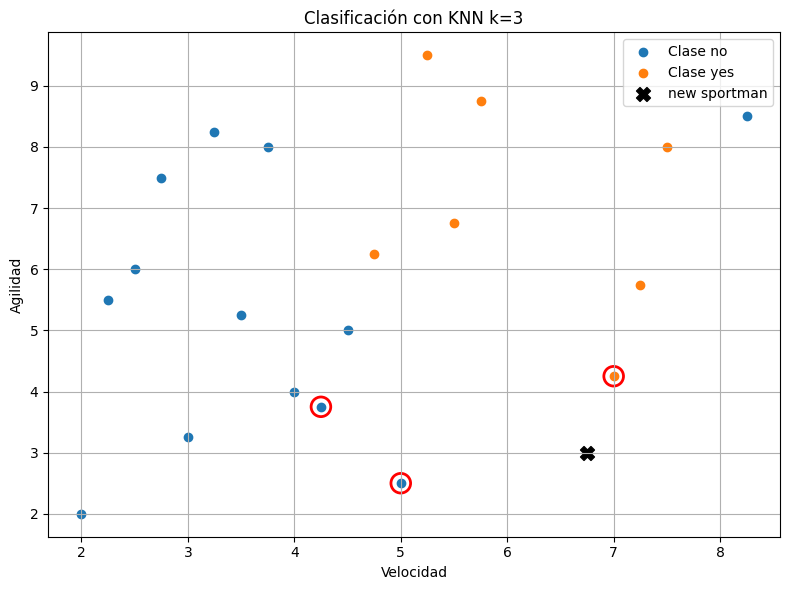

In [3]:
df = pd.read_csv('datasetSportman.csv')

X = df[["Velocidad", "Agilidad"]]
y = df["profesional"]

k = 3

# Crear y entrenar el modelo KNN con k=3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

newSportman = [[6.75,3.00]]

# Clasificar con KNN
prediccion = knn.predict(newSportman)[0]
vecinos = knn.kneighbors(newSportman, return_distance=False)[0]

# Imprimir información
print(f"Clase predicha para el nuevo punto {newSportman[0]}: Clase {prediccion}")
print(f"IDs (índices) de los 3 vecinos más cercanos: {vecinos}")

# Visualizar
plt.figure(figsize=(8, 6))

# Graficar los datos por clase
for target in df['profesional'].unique():
    cluster = df[df['profesional'] == target]
    plt.scatter(cluster["Velocidad"], cluster["Agilidad"], label=f'Clase {target}')

# Graficar el nuevo punto
plt.scatter(newSportman[0][0], newSportman[0][1], color='black', marker='X', s=100, label='new sportman')

# Graficar los vecinos más cercanos
for idx in vecinos:
    vecino = X.iloc[idx]
    plt.scatter(vecino[0], vecino[1], edgecolor='red', facecolor='none', s=200, linewidths=2)

# Atributos para el gráfico
plt.title(f"Clasificación con KNN k={k}")
plt.xlabel("Velocidad")
plt.ylabel("Agilidad")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

